In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import pandas as pd
import didactic_datamining as ddm

In [2]:
#dataset = ddm.create_dataset(npoints=10, minvalue=0, maxvalue=10)
dataset = np.asarray([[4,2],
                    [10,5],
                    [6,2],
                    [7,1],
                    [7,3],
                    [8,1],
                    [7,5],
                    [8,6],
                    [8,5]])

ddm.print_dataset(dataset)

P0 [4 2]
P1 [10  5]
P2 [6 2]
P3 [7 1]
P4 [7 3]
P5 [8 1]
P6 [7 5]
P7 [8 6]
P8 [8 5]


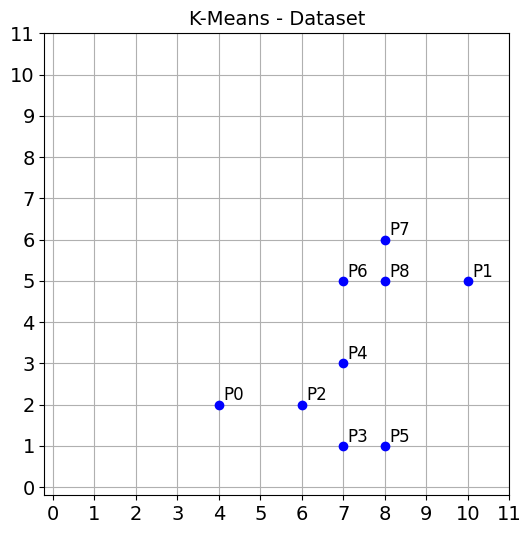

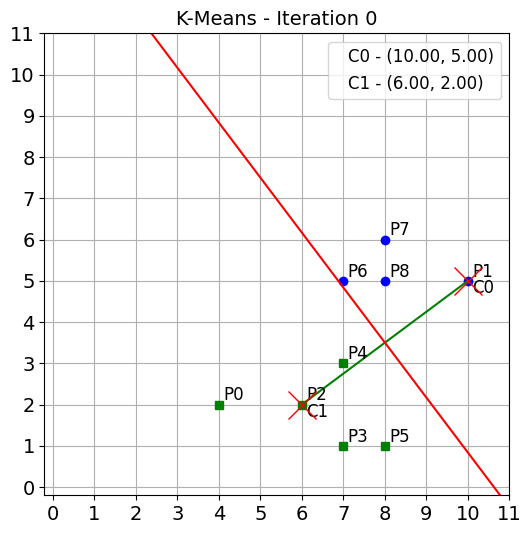

C0 (10.00, 5.00)
C1 (6.00, 2.00)


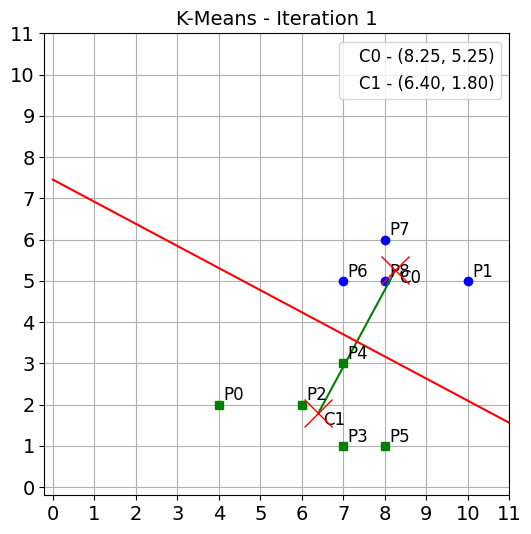

C0 (8.25, 5.25)
C1 (6.40, 1.80)


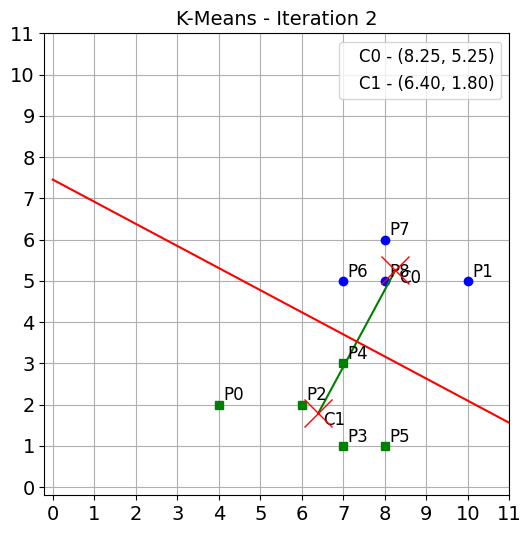

C0 (8.25, 5.25)
C1 (6.40, 1.80)


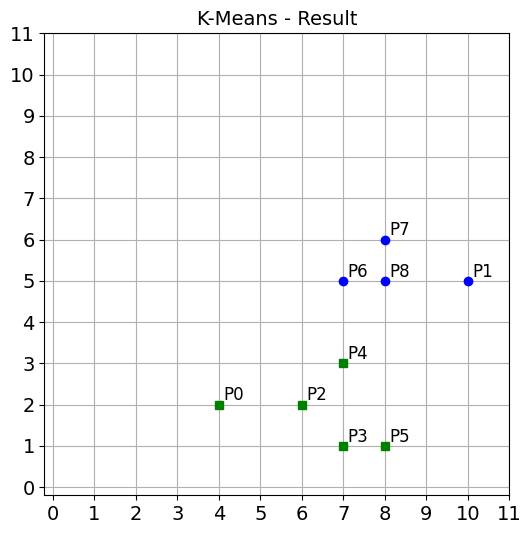

In [3]:
kmeans = ddm.DidatticKMeans(K=2, centroid_indexs=(1, 2), dist='euclidean')
kmeans.fit(dataset, step_by_step=False)

In [4]:
kmeans.get_jdata()

{'data': [[4, 2],
  [10, 5],
  [6, 2],
  [7, 1],
  [7, 3],
  [8, 1],
  [7, 5],
  [8, 6],
  [8, 5]],
 'iterations': [{'centers': [[10, 5], [6, 2]],
   'labels': [1, 0, 1, 1, 1, 1, 0, 0, 0]},
  {'centers': [[8.25, 5.25], [6.4, 1.8]],
   'labels': [1, 0, 1, 1, 1, 1, 0, 0, 0]}],
 'parameters': {'nbr_clusters': 2,
  'centroid_indexs': [1, 2],
  'distance': 'euclidean'}}

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


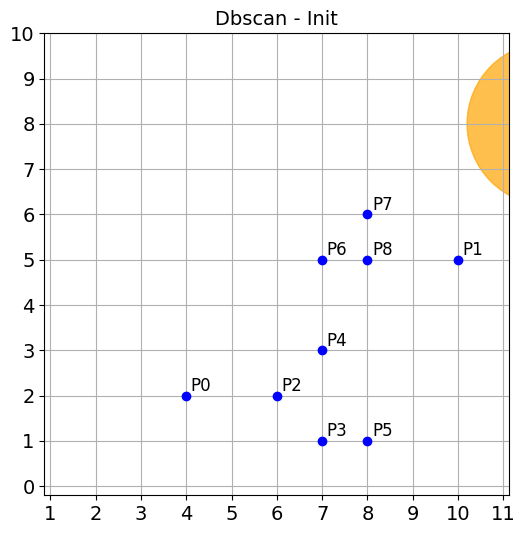

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


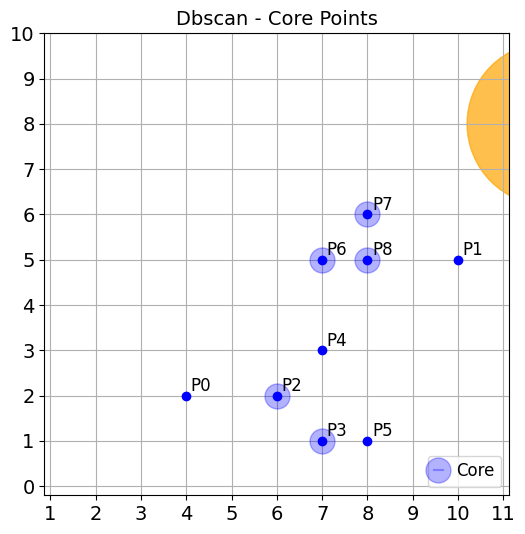

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Core Points [2, 3, 6, 7, 8]


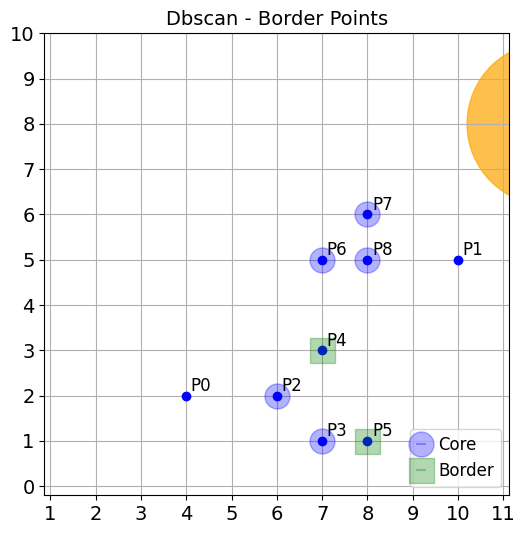

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Border Points [4, 5]


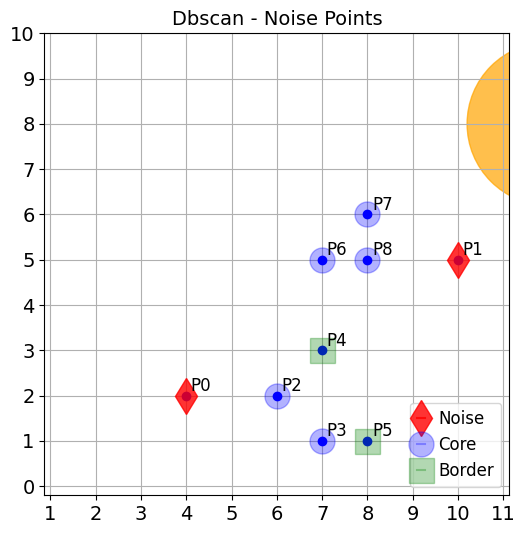

Noise Points [0, 1]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


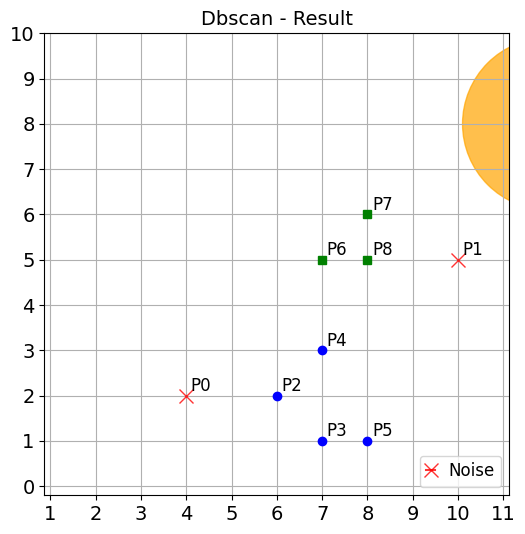

{0: {2, 3, 4, 5}, 1: {8, 6, 7}}


In [5]:
dbscan = ddm.DidatticDbscan(eps=1.8, min_pts=3)
dbscan.fit(dataset, step_by_step=False)

In [6]:
dbscan.get_jdata()

{'data': [[4, 2],
  [10, 5],
  [6, 2],
  [7, 1],
  [7, 3],
  [8, 1],
  [7, 5],
  [8, 6],
  [8, 5]],
 'parameters': {'eps': 1.8, 'min_pts': 3},
 'iterations': [{'core': [2, 3, 6, 7, 8]},
  {'border': [4, 5]},
  {'noise': [0, 1]},
  {'labels': [-1, -1, 0, 0, 0, 0, 1, 1, 1]}]}

iter 0
distance merge 0.00
[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,)]
[[0.   6.71 2.   3.16 3.16 4.12 4.24 5.66 5.  ]
 [6.71 0.   5.   5.   3.61 4.47 3.   2.24 2.  ]
 [2.   5.   0.   1.41 1.41 2.24 3.16 4.47 3.61]
 [3.16 5.   1.41 0.   2.   1.   4.   5.1  4.12]
 [3.16 3.61 1.41 2.   0.   2.24 2.   3.16 2.24]
 [4.12 4.47 2.24 1.   2.24 0.   4.12 5.   4.  ]
 [4.24 3.   3.16 4.   2.   4.12 0.   1.41 1.  ]
 [5.66 2.24 4.47 5.1  3.16 5.   1.41 0.   1.  ]
 [5.   2.   3.61 4.12 2.24 4.   1.   1.   0.  ]]
{np.int64(3): [np.int64(5)], np.int64(5): [np.int64(3)], np.int64(6): [np.int64(8)], np.int64(7): [np.int64(8)], np.int64(8): [np.int64(6), np.int64(7)]}



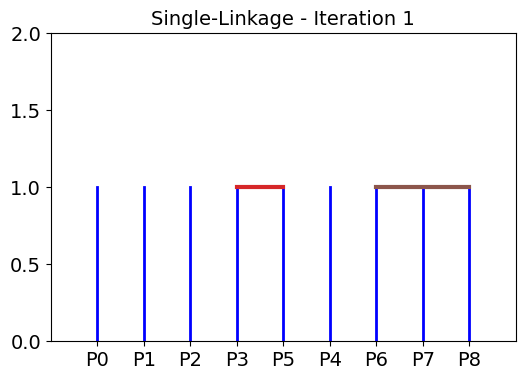

iter 1
distance merge 1.00
[(0,), (1,), (2,), (3, 5), (4,), (6, 7, 8)]
[[0.   6.71 2.   3.16 3.16 4.24]
 [6.71 0.   5.   4.47 3.61 2.  ]
 [2.   5.   0.   1.41 1.41 3.16]
 [3.16 4.47 1.41 0.   2.   4.  ]
 [3.16 3.61 1.41 2.   0.   2.  ]
 [4.24 2.   3.16 4.   2.   0.  ]]
{np.int64(2): [np.int64(3), np.int64(4)], np.int64(3): [np.int64(2)], np.int64(4): [np.int64(2)]}



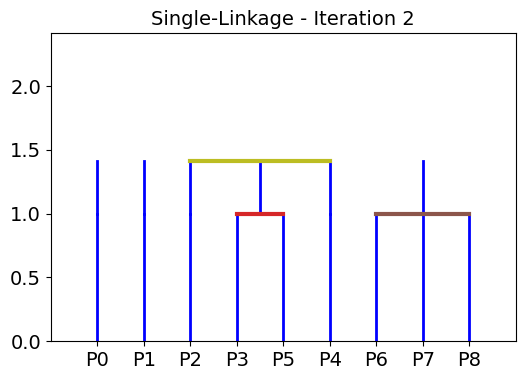

iter 2
distance merge 1.41
[((0,),), ((1,),), ((2,), (3, 5), (4,)), ((6, 7, 8),)]
[[0.   6.71 2.   4.24]
 [6.71 0.   3.61 2.  ]
 [2.   3.61 0.   2.  ]
 [4.24 2.   2.   0.  ]]
{np.int64(0): [np.int64(2)], np.int64(1): [np.int64(3)], np.int64(2): [np.int64(0), np.int64(3)], np.int64(3): [np.int64(1), np.int64(2)]}



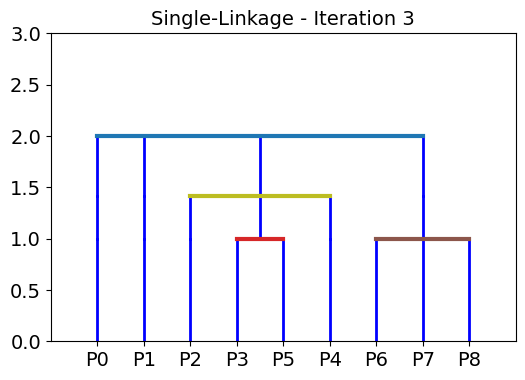

iter 3
distance merge 2.00
[(((0,),), ((1,),), ((2,), (3, 5), (4,)), ((6, 7, 8),))]
[[0.]]


In [7]:
hier = ddm.DidatticHierarchical()
hier.fit(dataset, link_criteria='min', use_distances=True, distance_type='euclidean', step_by_step=False)

In [8]:
hier.get_jdata()

{'data': [[4, 2],
  [10, 5],
  [6, 2],
  [7, 1],
  [7, 3],
  [8, 1],
  [7, 5],
  [8, 6],
  [8, 5]],
 'parameters': {'link_criteria': 'min',
  'distance': 'euclidean',
  'matrix_type': 'distance'},
 'iterations': [{'dist_merge': 0.0,
   'clusters_labels': [[0], [1], [2], [3], [4], [5], [6], [7], [8]],
   'dist_matrix': [[0.0,
     6.708203932499369,
     2.0,
     3.1622776601683795,
     3.1622776601683795,
     4.123105625617661,
     4.242640687119285,
     5.656854249492381,
     5.0],
    [6.708203932499369,
     0.0,
     5.0,
     5.0,
     3.605551275463989,
     4.47213595499958,
     3.0,
     2.23606797749979,
     2.0],
    [2.0,
     5.0,
     0.0,
     1.4142135623730951,
     1.4142135623730951,
     2.23606797749979,
     3.1622776601683795,
     4.47213595499958,
     3.605551275463989],
    [3.1622776601683795,
     5.0,
     1.4142135623730951,
     0.0,
     2.0,
     1.0,
     4.0,
     5.0990195135927845,
     4.123105625617661],
    [3.1622776601683795,
     3.605

iter 0
distance merge 0.00
[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,)]
[[0.   6.71 2.   3.16 3.16 4.12 4.24 5.66 5.  ]
 [6.71 0.   5.   5.   3.61 4.47 3.   2.24 2.  ]
 [2.   5.   0.   1.41 1.41 2.24 3.16 4.47 3.61]
 [3.16 5.   1.41 0.   2.   1.   4.   5.1  4.12]
 [3.16 3.61 1.41 2.   0.   2.24 2.   3.16 2.24]
 [4.12 4.47 2.24 1.   2.24 0.   4.12 5.   4.  ]
 [4.24 3.   3.16 4.   2.   4.12 0.   1.41 1.  ]
 [5.66 2.24 4.47 5.1  3.16 5.   1.41 0.   1.  ]
 [5.   2.   3.61 4.12 2.24 4.   1.   1.   0.  ]]
{np.int64(3): [np.int64(5)], np.int64(5): [np.int64(3)], np.int64(6): [np.int64(8)], np.int64(7): [np.int64(8)], np.int64(8): [np.int64(6), np.int64(7)]}



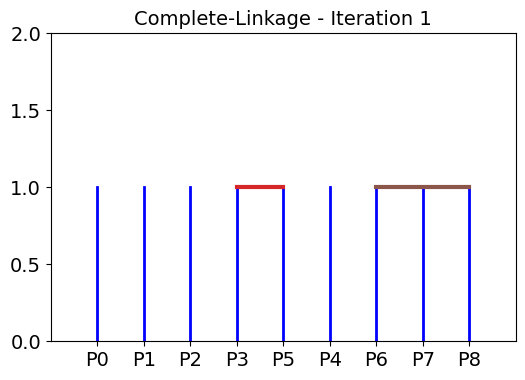

iter 1
distance merge 1.00
[(0,), (1,), (2,), (3, 5), (4,), (6, 7, 8)]
[[0.   6.71 2.   4.12 3.16 5.66]
 [6.71 0.   5.   5.   3.61 3.  ]
 [2.   5.   0.   2.24 1.41 4.47]
 [4.12 5.   2.24 0.   2.24 5.1 ]
 [3.16 3.61 1.41 2.24 0.   3.16]
 [5.66 3.   4.47 5.1  3.16 0.  ]]
{np.int64(2): [np.int64(4)], np.int64(4): [np.int64(2)]}



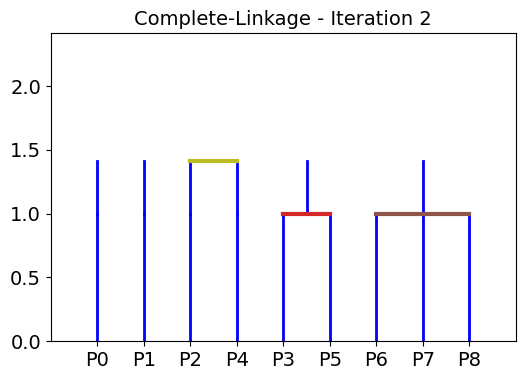

iter 2
distance merge 1.41
[((0,),), ((1,),), ((2,), (4,)), ((3, 5),), ((6, 7, 8),)]
[[0.   6.71 3.16 4.12 5.66]
 [6.71 0.   5.   5.   3.  ]
 [3.16 5.   0.   2.24 4.47]
 [4.12 5.   2.24 0.   5.1 ]
 [5.66 3.   4.47 5.1  0.  ]]
{np.int64(2): [np.int64(3)], np.int64(3): [np.int64(2)]}



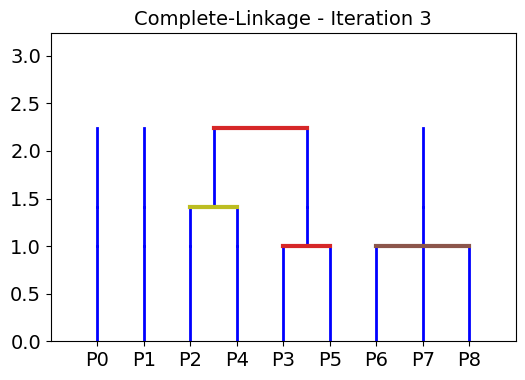

iter 3
distance merge 2.24
[(((0,),),), (((1,),),), (((2,), (4,)), ((3, 5),)), (((6, 7, 8),),)]
[[0.   6.71 4.12 5.66]
 [6.71 0.   5.   3.  ]
 [4.12 5.   0.   5.1 ]
 [5.66 3.   5.1  0.  ]]
{np.int64(1): [np.int64(3)], np.int64(3): [np.int64(1)]}



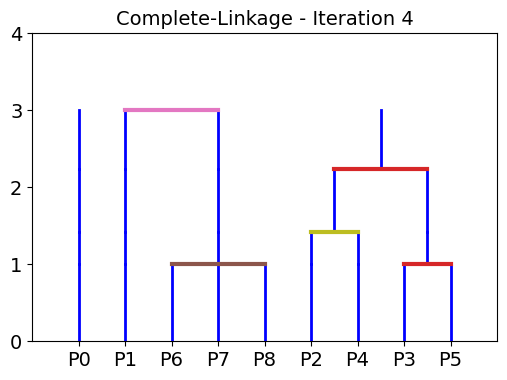

iter 4
distance merge 3.00
[((((0,),),),), ((((1,),),), (((6, 7, 8),),)), ((((2,), (4,)), ((3, 5),)),)]
[[0.   6.71 4.12]
 [6.71 0.   5.1 ]
 [4.12 5.1  0.  ]]
{np.int64(0): [np.int64(2)], np.int64(2): [np.int64(0)]}



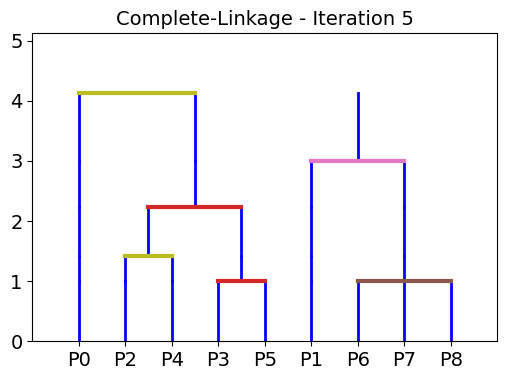

iter 5
distance merge 4.12
[(((((0,),),),), ((((2,), (4,)), ((3, 5),)),)), (((((1,),),), (((6, 7, 8),),)),)]
[[0.   6.71]
 [6.71 0.  ]]
{np.int64(0): [np.int64(1)], np.int64(1): [np.int64(0)]}



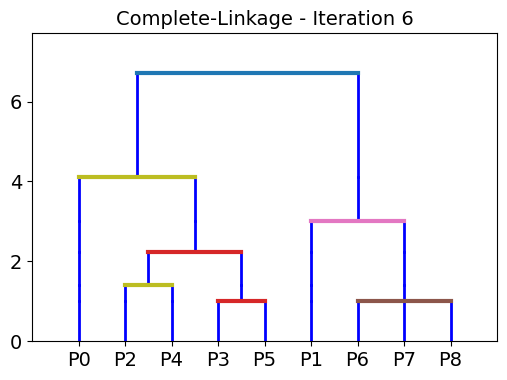

iter 6
distance merge 6.71
[((((((0,),),),), ((((2,), (4,)), ((3, 5),)),)), (((((1,),),), (((6, 7, 8),),)),))]
[[0.]]


In [9]:
hier = ddm.DidatticHierarchical()
hier.fit(dataset, link_criteria='max', use_distances=True, distance_type='euclidean', step_by_step=False)

In [10]:
hier.get_jdata()

{'data': [[4, 2],
  [10, 5],
  [6, 2],
  [7, 1],
  [7, 3],
  [8, 1],
  [7, 5],
  [8, 6],
  [8, 5]],
 'parameters': {'link_criteria': 'max',
  'distance': 'euclidean',
  'matrix_type': 'distance'},
 'iterations': [{'dist_merge': 0.0,
   'clusters_labels': [[0], [1], [2], [3], [4], [5], [6], [7], [8]],
   'dist_matrix': [[0.0,
     6.708203932499369,
     2.0,
     3.1622776601683795,
     3.1622776601683795,
     4.123105625617661,
     4.242640687119285,
     5.656854249492381,
     5.0],
    [6.708203932499369,
     0.0,
     5.0,
     5.0,
     3.605551275463989,
     4.47213595499958,
     3.0,
     2.23606797749979,
     2.0],
    [2.0,
     5.0,
     0.0,
     1.4142135623730951,
     1.4142135623730951,
     2.23606797749979,
     3.1622776601683795,
     4.47213595499958,
     3.605551275463989],
    [3.1622776601683795,
     5.0,
     1.4142135623730951,
     0.0,
     2.0,
     1.0,
     4.0,
     5.0990195135927845,
     4.123105625617661],
    [3.1622776601683795,
     3.605

In [11]:
#transactions = ddm.create_transactional_dataset(num_transaction=10, num_items=6, min_len=2, max_len=4)
transactions = [
    ['B', 'D', 'E'],
    ['B', 'C', 'E'],
    ['B', 'D'],
    ['B', 'C', 'D', 'E'],
    ['B', 'C', 'E', 'F'],
    ['B', 'C', 'E'],
    ['B', 'C', 'D', 'F'],
    ['B', 'D'],
    ['A', 'D'],
    ['B', 'C']
]
ddm.print_transactions(transactions)

['B', 'D', 'E']
['B', 'C', 'E']
['B', 'D']
['B', 'C', 'D', 'E']
['B', 'C', 'E', 'F']
['B', 'C', 'E']
['B', 'C', 'D', 'F']
['B', 'D']
['A', 'D']
['B', 'C']


In [12]:
apriori = ddm.DidatticApriori(min_sup=0.3, sup_type='r')
apriori.fit(transactions, step_by_step=False)

Apriori - Iteration 1
('A',) 0.10 X
('B',) 0.90 
('C',) 0.60 
('D',) 0.60 
('E',) 0.50 
('F',) 0.20 X
Apriori - Iteration 2
('B', 'C') 0.60 
('B', 'D') 0.50 
('B', 'E') 0.50 
('C', 'D') 0.20 X
('C', 'E') 0.40 
('D', 'E') 0.20 X
Apriori - Iteration 3
('B', 'C', 'E') 0.40 
Apriori - Iteration 4


In [13]:
apriori.extract_rules(min_conf=0.8)

('B',) --> ('C',) conf: 0.67 X 
('B',) --> ('C', 'E') conf: 0.44 X 
('B',) --> ('D',) conf: 0.56 X 
('B',) --> ('E',) conf: 0.56 X 
('B', 'C') --> ('E',) conf: 0.67 X 
('B', 'E') --> ('C',) conf: 0.80  lift: 1.33
('C',) --> ('B',) conf: 1.00  lift: 1.11
('C',) --> ('B', 'E') conf: 0.67 X 
('C',) --> ('E',) conf: 0.67 X 
('C', 'E') --> ('B',) conf: 1.00  lift: 1.11
('D',) --> ('B',) conf: 0.83  lift: 0.93
('E',) --> ('B',) conf: 1.00  lift: 1.11
('E',) --> ('B', 'C') conf: 0.80  lift: 1.33
('E',) --> ('C',) conf: 0.80  lift: 1.33


In [14]:
apriori.get_jdata()

{'min_sup': 0.3,
 'data': [['B', 'D', 'E'],
  ['B', 'C', 'E'],
  ['B', 'D'],
  ['B', 'C', 'D', 'E'],
  ['B', 'C', 'E', 'F'],
  ['B', 'C', 'E'],
  ['B', 'C', 'D', 'F'],
  ['B', 'D'],
  ['A', 'D'],
  ['B', 'C']],
 'parameters': {'min_sup': 0.3, 'sup_type': 'r', 'min_conf': 0.8},
 'itemsets': [[[['A'], 0.1, 'X'],
   [['B'], 0.9, ''],
   [['C'], 0.6, ''],
   [['D'], 0.6, ''],
   [['E'], 0.5, ''],
   [['F'], 0.2, 'X']],
  [[['B', 'C'], 0.6, ''],
   [['B', 'D'], 0.5, ''],
   [['B', 'E'], 0.5, ''],
   [['C', 'D'], 0.2, 'X'],
   [['C', 'E'], 0.4, ''],
   [['D', 'E'], 0.2, 'X']],
  [[['B', 'C', 'E'], 0.4, '']],
  []],
 'min_conf': 0.8,
 'rules': [[['B'], ['C'], 0.6666666666666666, 'X', ''],
  [['B'], ['C', 'E'], 0.4444444444444444, 'X', ''],
  [['B'], ['D'], 0.5555555555555556, 'X', ''],
  [['B'], ['E'], 0.5555555555555556, 'X', ''],
  [['B', 'C'], ['E'], 0.6666666666666666, 'X', ''],
  [['B', 'E'], ['C'], 0.8, '', 1.3333333333333335],
  [['C'], ['B'], 1.0, '', 1.111111111111111],
  [['C'], ['B

In [15]:
train = pd.read_csv('train.csv', skipinitialspace=True, delimiter=',')
test = pd.read_csv('test.csv', skipinitialspace=True, delimiter=',')

In [16]:
train

,Contract,Sex,Minutes,Churn
0,Classic,F,50,YES
1,Travel,M,60,NO
2,Travel,M,70,YES
3,Young,F,80,NO
4,Travel,F,90,NO
5,Classic,M,100,YES
6,Classic,M,110,YES
7,Young,F,50,YES
8,Young,M,150,NO
9,Travel,F,100,NO


In [17]:
test

,Contract,Sex,Minutes,Churn
0,Classic,F,30,YES
1,Travel,M,60,NO
2,Travel,F,100,NO
3,Travel,M,100,YES


Root
Parent
	1 - 5.0/10 = 5.0/10
Contract ['Classic', 'Travel', 'Young']
	 Classic 3
		YES, 3/3
	,	1 - 3.0/3 = 0.0/3
	 Travel 4
		NO, 3/4
		YES, 1/4
	,	1 - 3/4 = 1/4
	 Young 3
		NO, 2/3
		YES, 1/3
	,	1 - 2/3 = 1/3
	 (0.0/3 * 3/10) + (1/4 * 4.0/10) + (1/3 * 3/10) = 2.0/10
Contract# ['Classic-Travel', 'Young']
	 Classic-Travel 7
		NO, 3/7
		YES, 4/7
	,	1 - 4/7 = 3/7
	 Young 3
		NO, 2/3
		YES, 1/3
	,	1 - 2/3 = 1/3
	 (3/7 * 7/10) + (1/3 * 3/10) = 4.0/10
	Delta Gain: 5.0/10 - 4.0/10 = 1/10

Contract# ['Classic-Young', 'Travel']
	 Classic-Young 6
		NO, 2/6
		YES, 4/6
	,	1 - 4.0/6 = 2.0/6
	 Travel 4
		NO, 3/4
		YES, 1/4
	,	1 - 3/4 = 1/4
	 (2.0/6 * 6.0/10) + (1/4 * 4.0/10) = 3/10
	Delta Gain: 5.0/10 - 3/10 = 2.0/10

Contract# ['Classic', 'Young-Travel']
	 Classic 3
		YES, 3/3
	,	1 - 3.0/3 = 0.0/3
	 Young-Travel 7
		NO, 5/7
		YES, 2/7
	,	1 - 5/7 = 2/7
	 (0.0/3 * 3/10) + (2/7 * 7/10) = 2.0/10
	Delta Gain: 5.0/10 - 2.0/10 = 3/10

Sex ['F', 'M']
	 F 5
		NO, 3/5
		YES, 2/5
	,	1 - 3/5 = 2/5
	 M 5
		

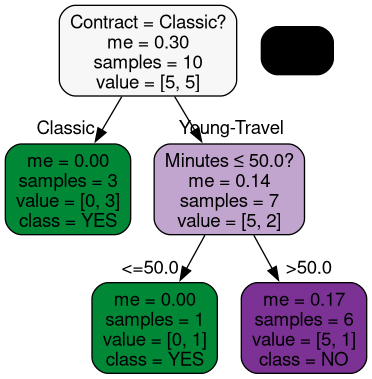

In [18]:
tree = ddm.DidatticClassificationTree(fun=ddm.error_rate, fun_name='me',
                                      min_samples_split=2, min_samples_leaf=1, step_by_step=False)
tree.fit(train, target='Churn')

In [19]:
test['Predicted'] = tree.predict(test)

tree.evaluate(test)

R\P	|NO	|YES	|
NO	|2	|0	|
YES	|1	|1	|
Precision 1 1.0
Recall 1/2 0.5
F1-measure 2/3 0.6666666666666666
Accuracy 3/4 0.75


In [20]:
tree.get_jdata()

{'columns': ['Contract', 'Sex', 'Minutes', 'Churn'],
 'train': [['Classic', 'F', 50, 'YES'],
  ['Travel', 'M', 60, 'NO'],
  ['Travel', 'M', 70, 'YES'],
  ['Young', 'F', 80, 'NO'],
  ['Travel', 'F', 90, 'NO'],
  ['Classic', 'M', 100, 'YES'],
  ['Classic', 'M', 110, 'YES'],
  ['Young', 'F', 50, 'YES'],
  ['Young', 'M', 150, 'NO'],
  ['Travel', 'F', 100, 'NO']],
 'target': ['Churn', 3],
 'parameters': {'split_function': 'me',
  'min_samples_split': 2,
  'min_samples_leaf': 1},
 'tree': {'name': 'Root',
  'parent_gain': 0.5,
  'records': 10,
  'values': {'YES': 5, 'NO': 5},
  'children': [{'name': 'Root_Contract#Young-Travel&Classic?Classic',
    'parent_gain': 0.0,
    'records': 3,
    'values': {'YES': 3},
    'children': [],
    'calculus': 'Root_Contract#Young-Travel&Classic?ClassicParent--> No gain. Stop\n',
    'class_majority': 'YES'},
   {'name': 'Root_Contract#Young-Travel&Classic?Young-Travel',
    'parent_gain': 0.2857142857142857,
    'records': 7,
    'values': {'NO': 5, 'YES